In [1]:
import sys
sys.path.append('..')

In [2]:
from config_simulation import (
    algo,
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
    N,
    n,
)

from functools import partial
optimizer_list = [
    # WASGD
    partial(algo.SGD, averaged=True, lr_add_iter=10),
    
    # SNA
    partial(algo.SNA, lr_add_iter=10),
    partial(algo.SNA, averaged=True, lr_add_iter=10),
    
    #USNA
    partial(algo.USNA, lr_add_iter=10, new_version=True),
    
    #UWASNA
    partial(algo.USNA, averaged=True, lr_add_iter=10, new_version=True),
]


In [3]:
# N = 2
# n = 1000

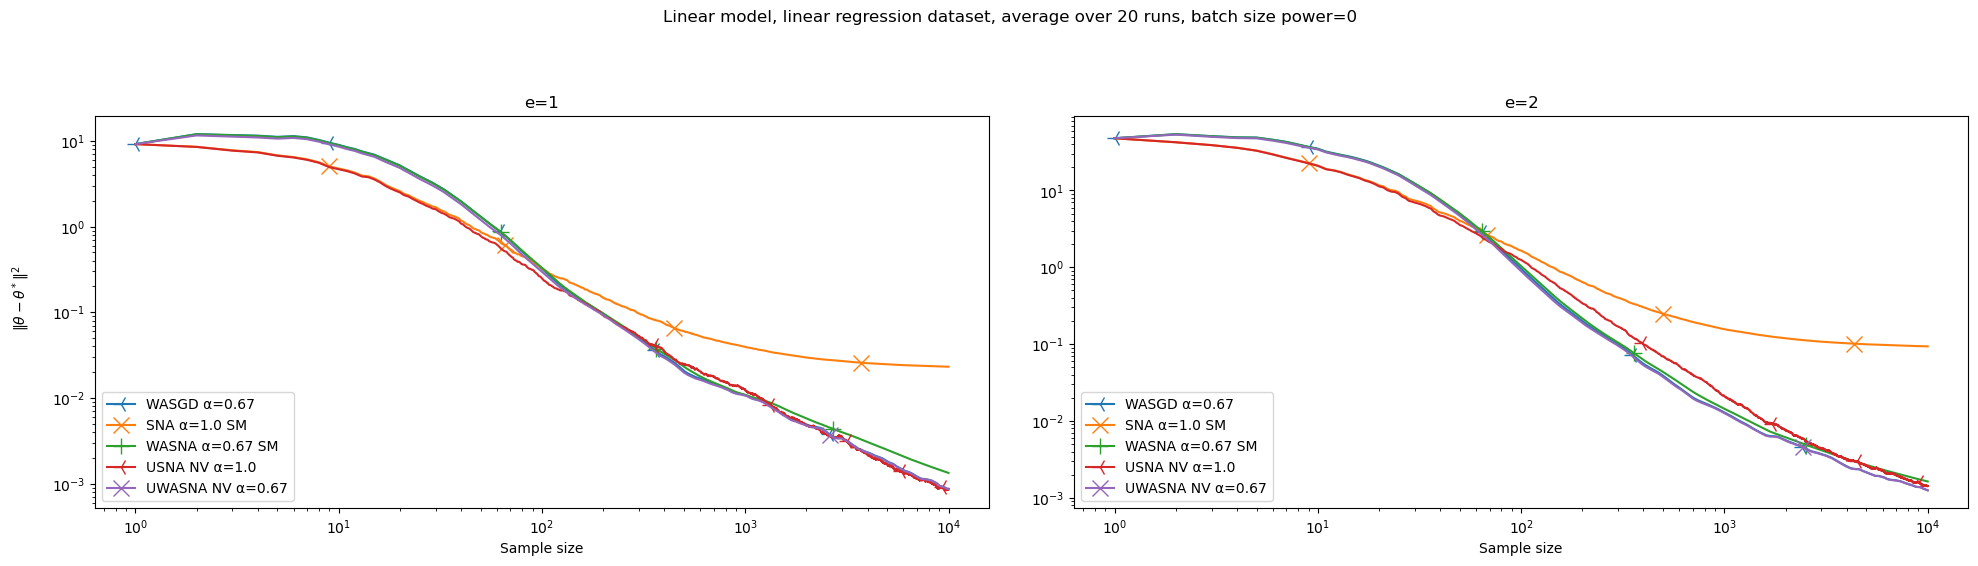

In [4]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

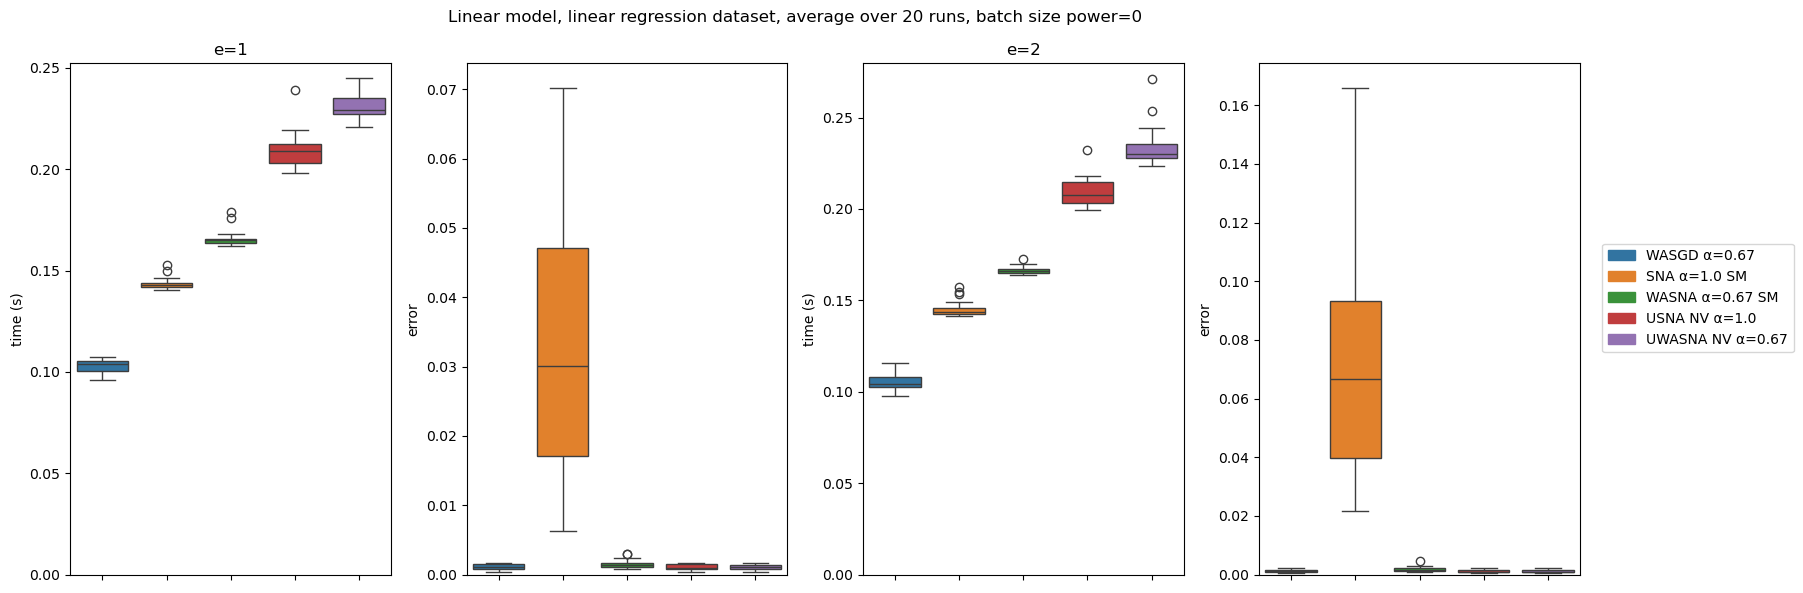

In [5]:
simulation.run_multiple_track_time(N=N, n=n)

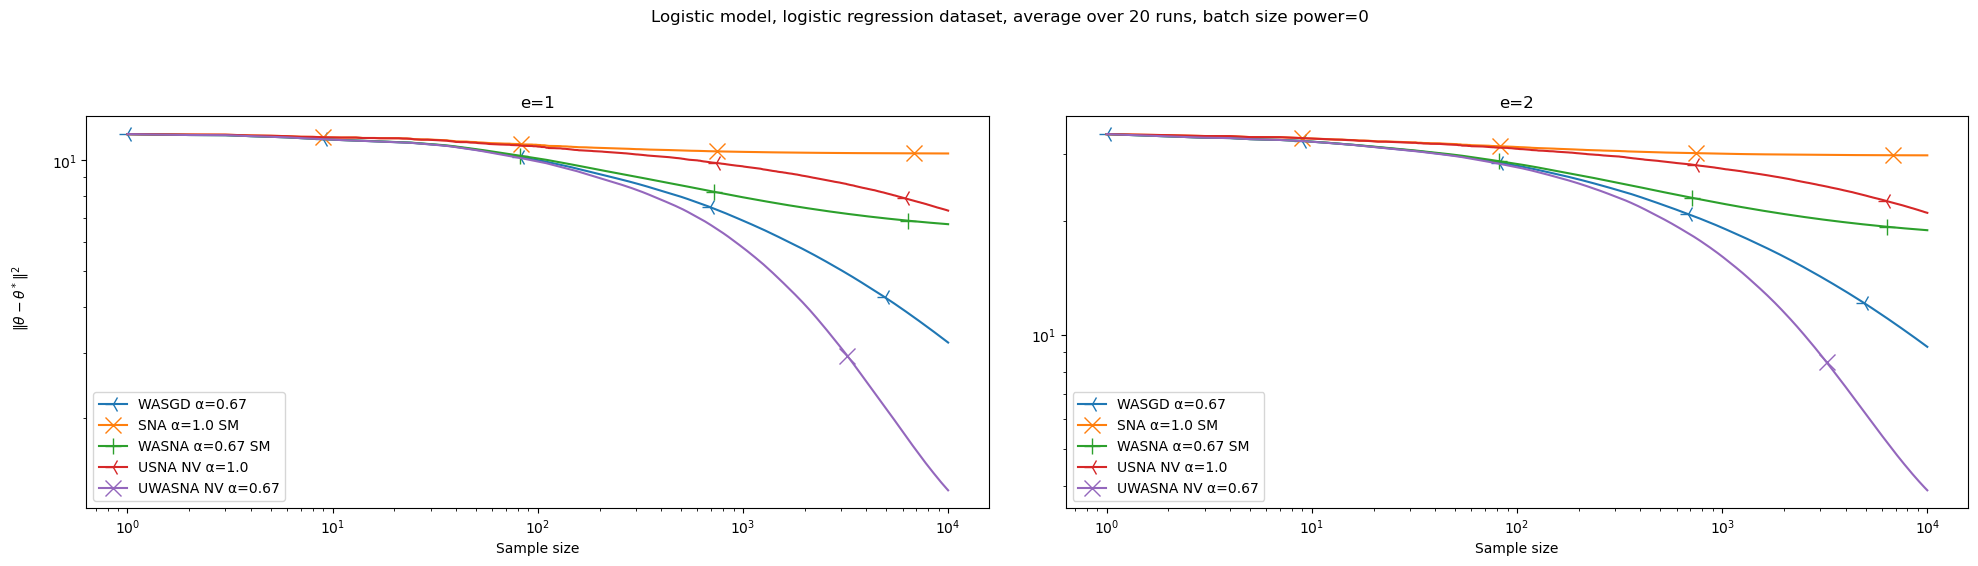

In [6]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

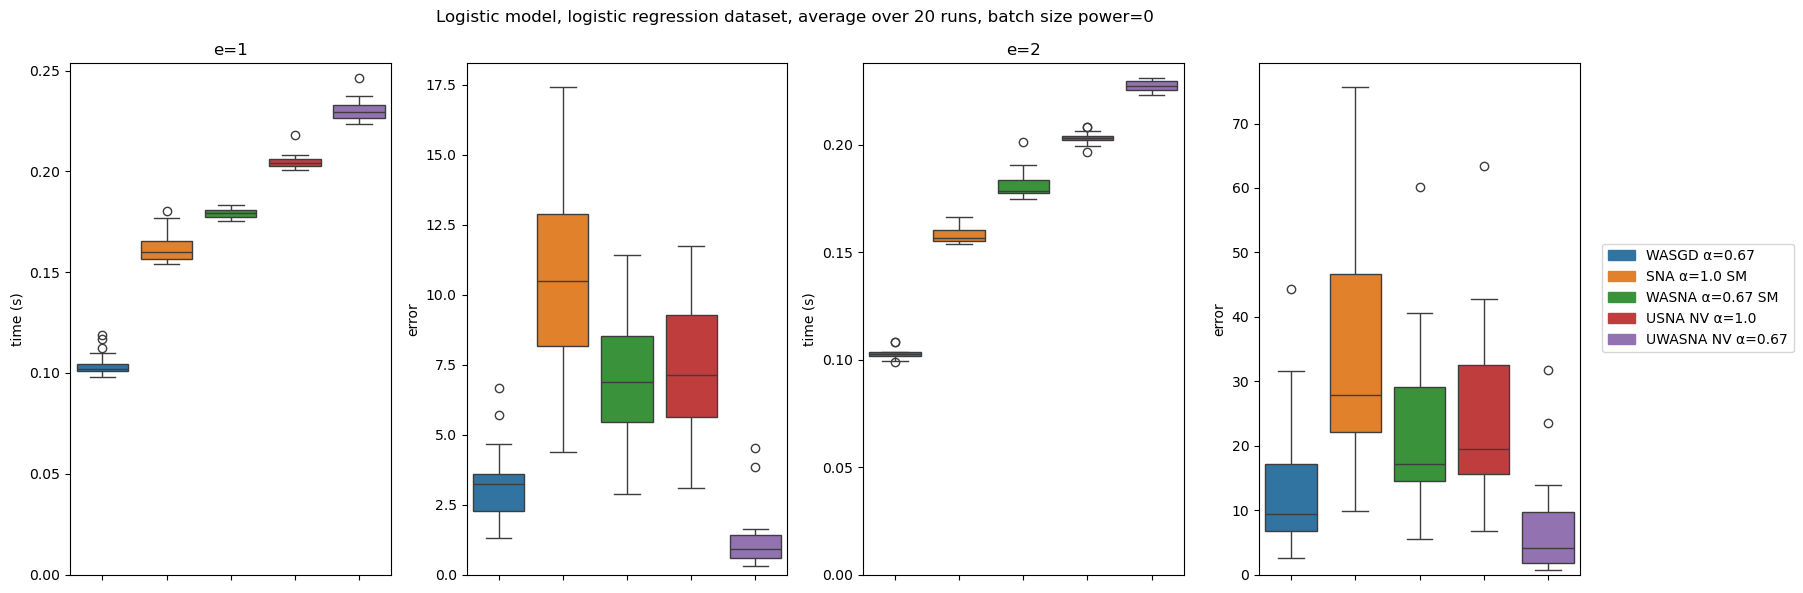

In [7]:
simulation.run_multiple_track_time(N=N, n=n)

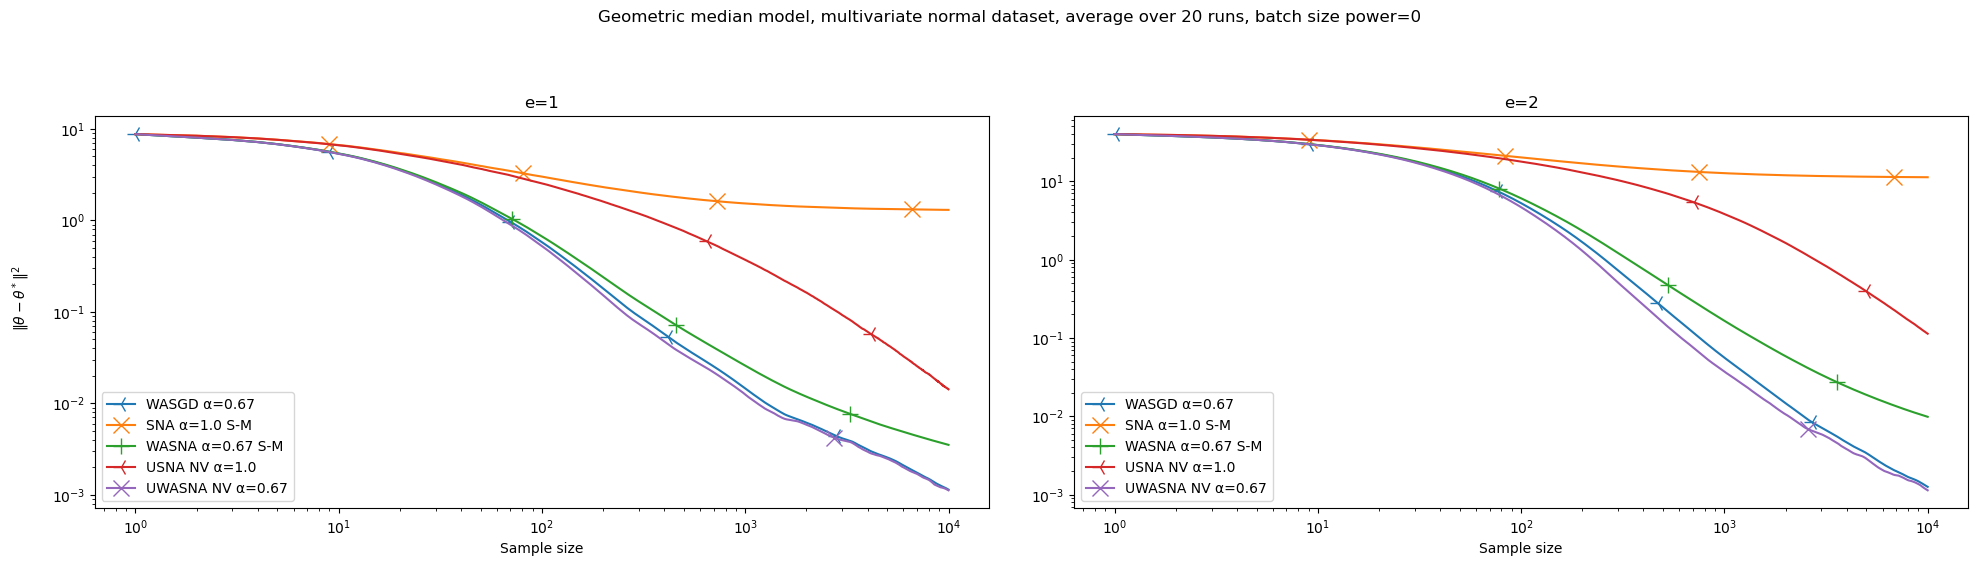

In [3]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

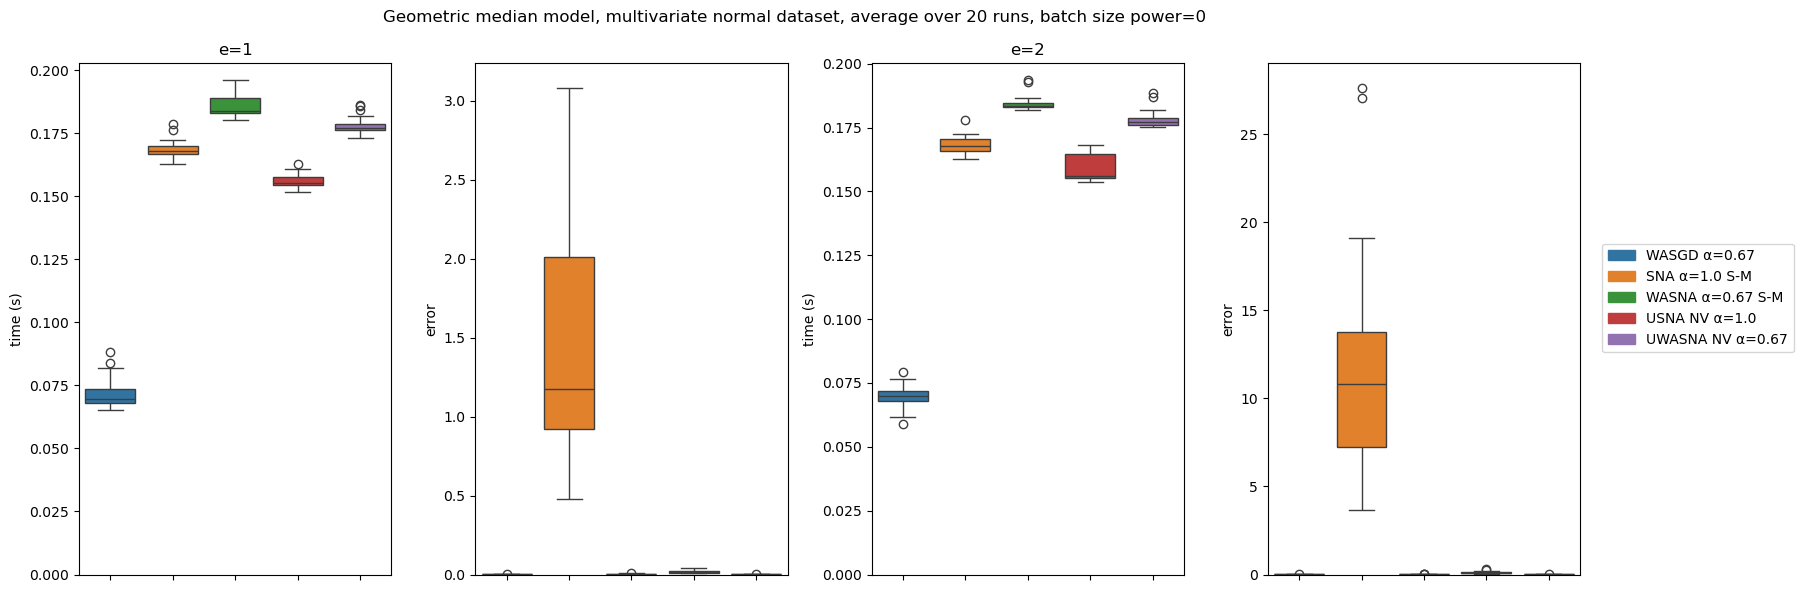

In [4]:
simulation.run_multiple_track_time(N=N, n=n)

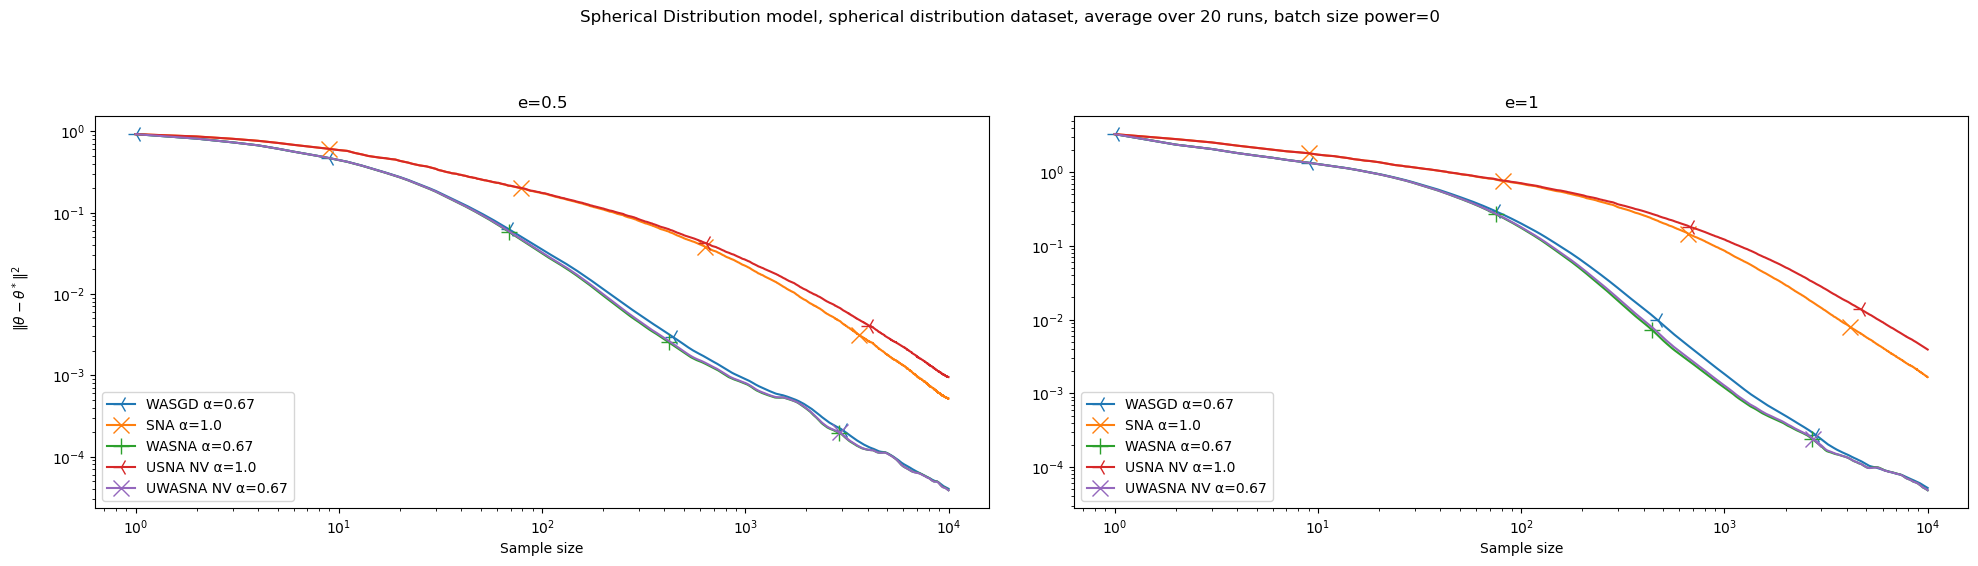

In [5]:
simulation = simulation_spherical_distribution( optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

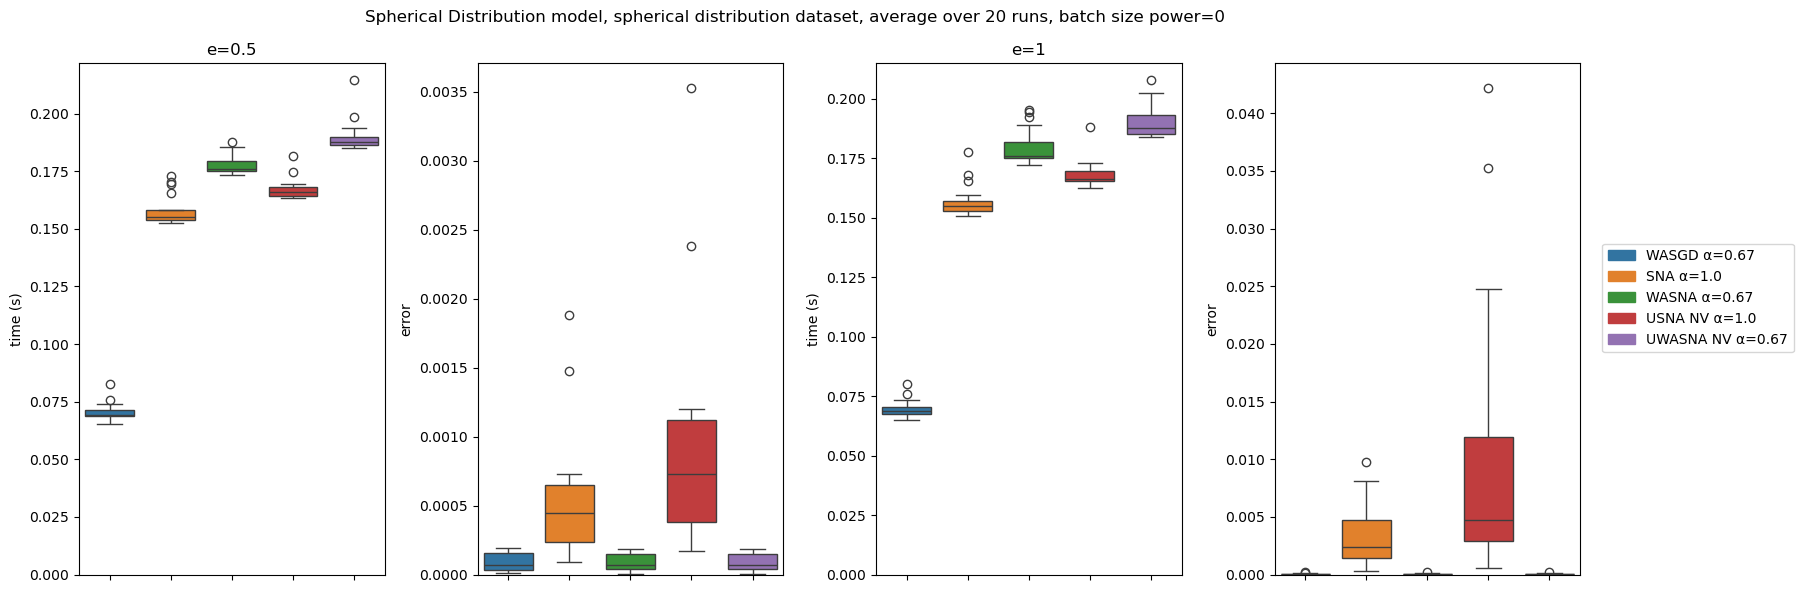

In [6]:
simulation.run_multiple_track_time(N=N, n=n)

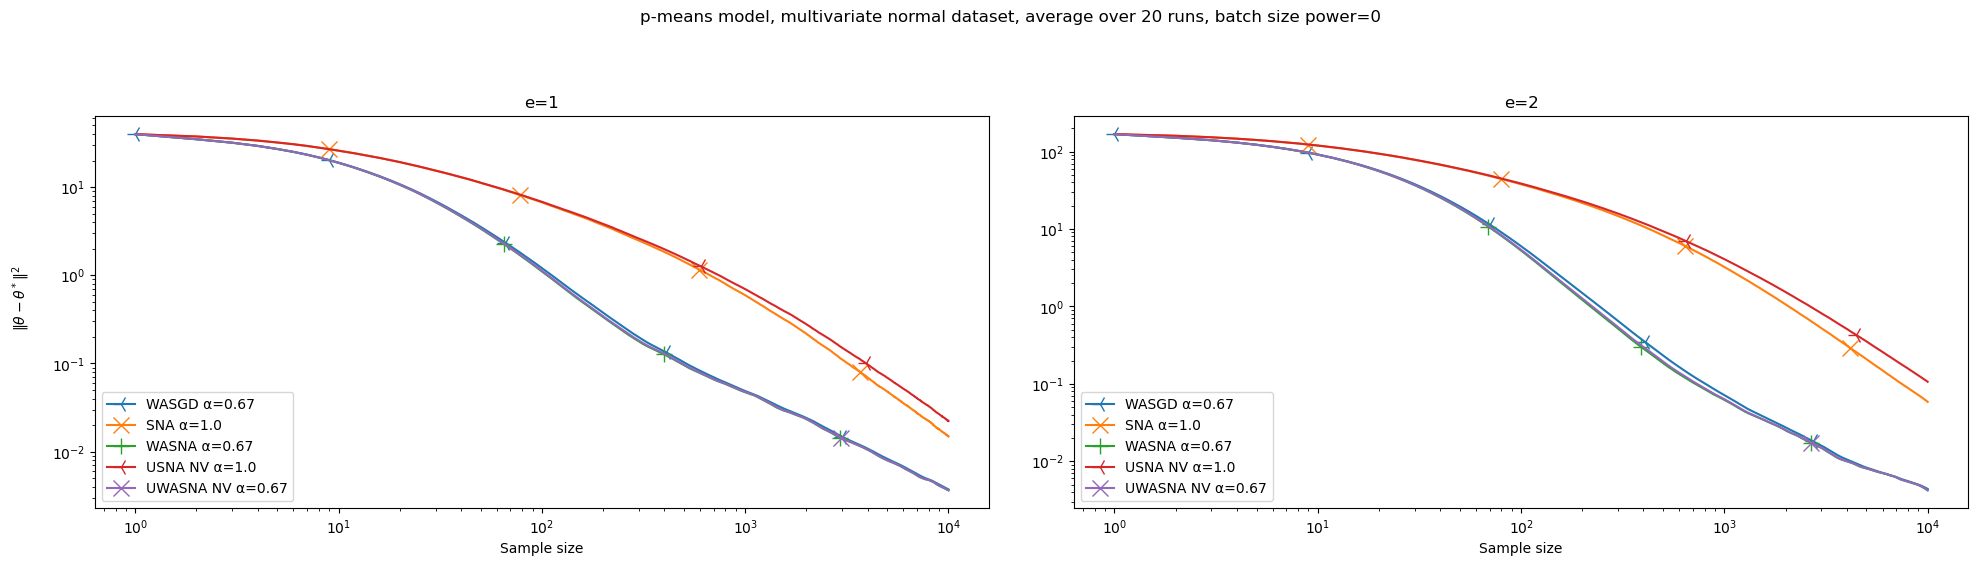

In [7]:
simulation = simulation_p_means(optimizer_list=optimizer_list)
simulation.run_multiple_track_errors(N=N, n=n)

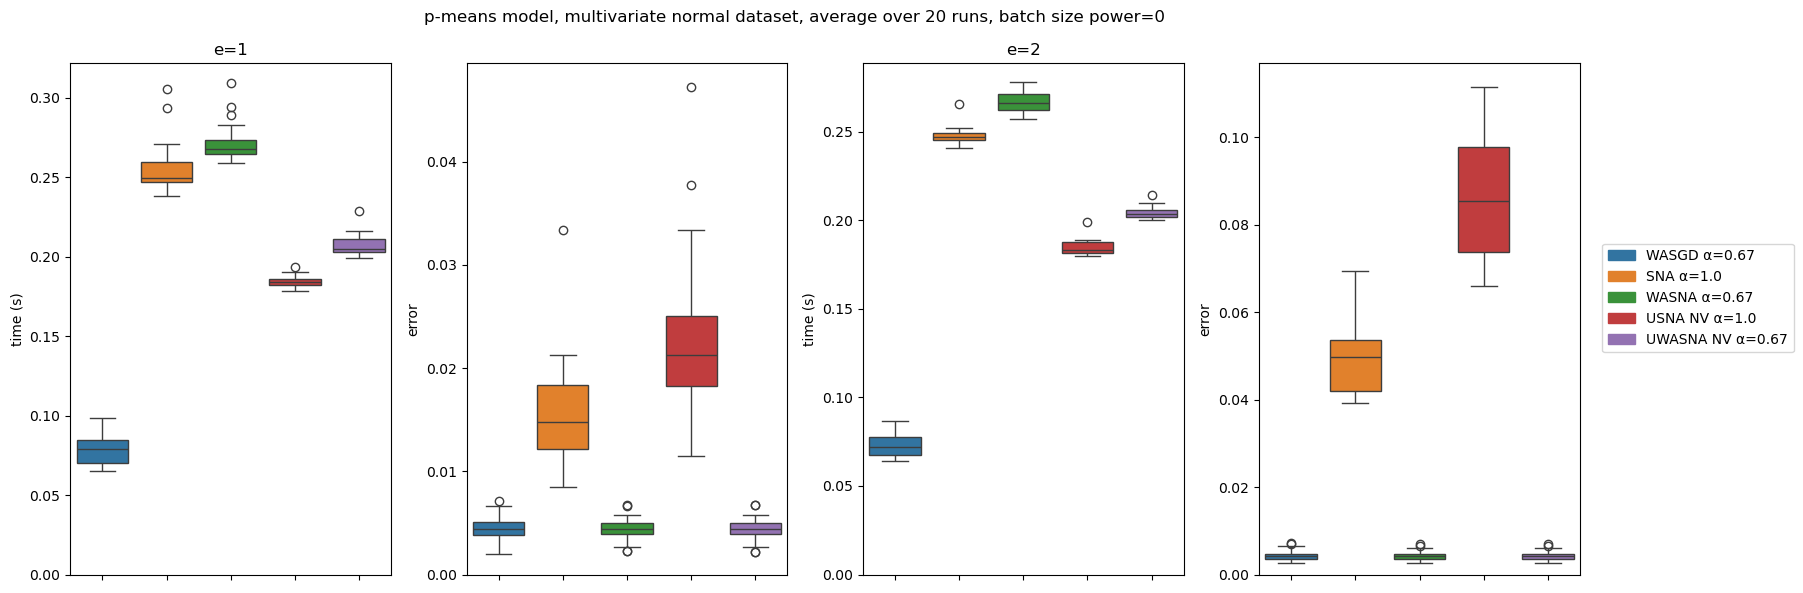

In [8]:
simulation.run_multiple_track_time(N=N, n=n)

In [9]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run_track_time()

Optimizers:   0%|          | 0/5 [00:00<?, ?it/s]

Data:   0%|          | 0/464809 [00:00<?, ?it/s]

,WASGD α=0.67,SNA α=1.0 S-M,WASNA α=0.67 S-M,USNA NV α=1.0,UWASNA NV α=0.67
Execution Time,4.822358,9.637634,10.765787,12.089539,13.285295
Training Accuracy,0.729269,0.596245,0.691215,0.674260,0.727180
Test Accuracy,0.731737,0.597609,0.693605,0.675430,0.730291


In [10]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run_track_time()

Optimizers:   0%|          | 0/5 [00:00<?, ?it/s]

Data:   0%|          | 0/464809 [00:00<?, ?it/s]

,WASGD α=0.67,SNA α=1.0 S-M,WASNA α=0.67 S-M,USNA NV α=1.0,UWASNA NV α=0.67
Execution Time,4.759860,9.550296,10.856693,12.161014,13.159767
Training Accuracy,0.729269,0.596245,0.691215,0.725877,0.724603
Test Accuracy,0.731737,0.597609,0.693605,0.726737,0.727589
